In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Step 0: Load the Data

This data contains over 3 million transactions, where people make contributions to their super accounts. The data includes transaction date, amount, contribution type, birthday and address information.

In [2]:
df = pd.read_csv('./contribution_transaction.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,transactionDate,amount,gstPercent,gstAmount,employerCC,personalCC,personalNonCC,spouseAndChild,govCoContrib,...,downsizer,peopleId,birthday,address_id,AddressPostcode,AddressState,country,townCity,fundId,account_id
0,10235283,2017-07-01,-65000.0,NotApplicable,0.0,65000.0,0.0,0.0,0.0,0.0,...,0.0,0000000041e91fd10141e94b30bf0002,1947-11-09 00:00:00,782753,3187,VICTORIA,AU,Brighton East,8a348baf6661f35001666223468a000e,1
1,10235284,2017-07-01,-65000.0,NotApplicable,0.0,65000.0,0.0,0.0,0.0,0.0,...,0.0,0000000041e91fd10141e94b30bf0002,1947-11-09 00:00:00,782753,3187,VICTORIA,AU,Brighton East,8a348b366661f7c7016662235cdf0018,1
2,10235285,2017-07-01,-65000.0,NotApplicable,0.0,65000.0,0.0,0.0,0.0,0.0,...,0.0,0000000041e91fd10141e94b30bf0002,1947-11-09 00:00:00,782753,3187,VICTORIA,AU,Brighton East,8a348baf6661f3500166622359a6000f,1
3,1309528,2015-07-01,-25000.0,NaN,0.0,25000.0,0.0,0.0,0.0,0.0,...,0.0,000000004200c19a014201a82cc10004,1951-05-20 00:00:00,26,NaN,NaN,AU,NaN,8a9c9e23553432c2015534361beb0000,1
4,1598692,2015-07-01,-250.0,NaN,0.0,250.0,0.0,0.0,0.0,0.0,...,0.0,000000004200c19a014201a82cc10004,1951-05-20 00:00:00,26,NaN,NaN,AU,NaN,94949c5a560c643101560c6ca29e0001,1


In [4]:
df.shape

(3069561, 36)

In [5]:
df.dtypes

id                               int64
transactionDate                 object
amount                         float64
gstPercent                      object
gstAmount                      float64
employerCC                     float64
personalCC                     float64
personalNonCC                  float64
spouseAndChild                 float64
govCoContrib                   float64
anyOther                       float64
directTerminationPayTaxable    float64
directTerminationPayTaxFree    float64
cgt15Year                      float64
cgtRetirement                  float64
personalInjury                 float64
otherFamilyFriends             float64
foreignAssess                  float64
foreignNonAssess               float64
transReservesAssess            float64
transReservesNonAssess         float64
nonComplying                   float64
nonMandated                    float64
reservesEmployerCC             float64
reservesPersonalCC             float64
reservesPersonalNonCC    

### Step 1: Preprocessing

In [6]:
df_clean = df.copy()

#### Step 1.1: Drop Id columns

In [7]:
df_clean = df_clean.drop(['peopleId', 'address_id', 'fundId'], axis=1)

In [8]:
df_clean.shape

(3069561, 33)

#### Step 1.2: Assess Data

In [9]:
# columns without missing data
df_clean.columns[df_clean.isnull().mean()==0]

Index(['id', 'transactionDate', 'amount', 'employerCC', 'personalCC',
       'personalNonCC', 'spouseAndChild', 'govCoContrib', 'anyOther',
       'directTerminationPayTaxable', 'directTerminationPayTaxFree',
       'cgt15Year', 'cgtRetirement', 'personalInjury', 'otherFamilyFriends',
       'foreignAssess', 'foreignNonAssess', 'transReservesAssess',
       'transReservesNonAssess', 'nonComplying', 'nonMandated',
       'reservesEmployerCC', 'reservesPersonalCC', 'reservesPersonalNonCC',
       'account_id'],
      dtype='object')

In [10]:
# columns with over 40% missing data
df_clean.columns[df_clean.isnull().mean() > 0.4]

Index(['gstPercent', 'gstAmount'], dtype='object')

In [11]:
# columns with small number of missing data
df_clean.columns[df_clean.isnull().mean() > 0]

Index(['gstPercent', 'gstAmount', 'downsizer', 'birthday', 'AddressPostcode',
       'AddressState', 'country', 'townCity'],
      dtype='object')

In [12]:
df_clean['country'].value_counts()

AU    3029649
NZ        298
AT        245
US        199
GB        101
CA         78
AL         78
SG         56
PG         43
AW         39
AE         30
AI         20
HK         18
CZ         16
TH         14
IE         11
SE         10
BN          9
BG          9
CN          6
ES          4
NL          4
GI          3
DE          2
ID          2
FR          2
CM          1
Name: country, dtype: int64

#### Step 1.3: Clean Data

In [13]:
# Drop fake transactions by account_id
fake_account_ids = [0, 1, 2, 4, 5, 6, 9, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 31, 32, 33, 34,
                    35, 36, 227, 290, 386, 413, 510, 511, 600, 601, 602, 603, 622, 623, 624, 683, 684,
                    709, 718, 719, 721, 726, 730, 730, 739, 740, 741, 743, 744, 745, 749, 751, 754,
                    755, 757, 758, 759, 760, 763, 828, 829, 877, 919, 920, 920, 957, 958, 959, 1217,
                    1218, 1224, 1232, 1257, 1288, 1298, 1326, 1340, 1359, 1666, 1820, 1956, 2118, 2205,
                    2208, 2214, 2215, 2227, 2282, 2291, 2400, 2406, 2408, 2410, 2417, 2474, 2538, 2643,
                    2672, 2747, 2762, 2771, 2809, 2841, 2842, 2843, 2855, 2891, 2919, 2996, 3007, 3015,
                    3101, 3120, 3130, 3186, 3202, 3269, 3279, 3334, 3360, 3383, 3401, 3440, 3489, 3500,
                    3509, 3536, 3548, 3564, 3642, 3664, 3687, 3691, 3706, 3729, 3770, 3802, 3813, 3851,
                    3870, 3871, 3872, 3873, 3875, 3876, 3877, 3906, 3913, 3935, 3958, 3960, 3961, 3962,
                    3999, 4056, 4057, 4079, 4123, 4177, 4335, 4498, 4500, 4501, 4503, 4577, 4583, 4590,
                    4621, 4637, 4688, 4712, 4776, 4786, 4788, 4823, 4828, 4829, 4897, 4898, 4899, 4900,
                    4903, 4945, 4952, 4953, 5105, 5110, 5111, 5124, 5190, 5209, 5312, 5325, 5326, 5459,
                    5492, 5554, 5584, 5635, 5643, 5645, 5657, 5658, 5659, 5660, 5661, 5715, 5718, 5719,
                    5720, 5721, 5725, 5737, 5751, 5762, 5821, 5853, 5854, 5894, 5895, 5946, 6032, 6033,
                    6063, 6075, 6121, 6122, 6152, 6161, 6162, 6219, 6220, 6305, 6324, 6390, 6426, 6463,
                    6579, 6595, 6651, 6680, 6711, 6910, 6910, 6911, 6911, 6913, 6950, 7057, 7131, 7136,
                    7214, 7219, 7225, 7254, 7273, 7295, 7341, 7344, 7352, 7389, 7429, 7463]

df_clean = df_clean[~df_clean.account_id.isin(fake_account_ids)]
df_clean = df_clean.drop(['account_id'], axis=1)

In [14]:
# Drop gstPercent and gstAmount, as both don't relate to the business questions.
df_clean = df_clean.drop(['gstPercent', 'gstAmount'], axis=1)

In [15]:
# Drop rows where country is not "AU", and also remove the country column
df_clean = df_clean[df_clean.country == 'AU']
df_clean = df_clean[df_clean.AddressState != 'FOREIGN']
df_clean = df_clean.drop(['country'], axis=1)

In [16]:
# Drop rows without a birthday or address, becasue it is likely they are fake data.
df_clean = df_clean.dropna(subset=['birthday', 'AddressPostcode', 'AddressState', 'townCity'])

In [17]:
# Drop downsizer columns, because downsizer is introduced after 01/07/2018.
df_clean = df_clean.drop(['downsizer'], axis=1)

In [18]:
# Drop rows where birthday is outside the reasonable range
df_clean = df_clean[df_clean.birthday > '1920-01-01']
df_clean = df_clean[df_clean.birthday < '2010-01-01']

In [19]:
# Drop rows where amount is outside the reasonable range
df_clean['amount'] = -df_clean['amount']
df_clean = df_clean[df_clean.amount > 0]
df_clean = df_clean[df_clean.amount <= 600000]

#### Step 1.4: Add age column

In [20]:
df_clean['transactionDate'] = pd.to_datetime(df_clean['transactionDate'], format='%Y-%m-%d')

In [21]:
df_clean['birthday'] = pd.to_datetime(df_clean['birthday'], infer_datetime_format=True)

In [22]:
df_clean['age'] = (df_clean['transactionDate'] - df_clean['birthday']) / np.timedelta64(1, 'Y')

In [23]:
df_clean['age'] = df_clean['age'].apply(np.floor)

### Step 2: Analyze, Modal and Visualize

##### Question 1: Who makes super contribution? 

In [24]:
df_clean['age'].value_counts().nlargest(10)

56.0    117429
57.0    116888
55.0    115414
58.0    112739
54.0    112077
59.0    108651
53.0    108054
60.0    107488
61.0    104893
52.0    100425
Name: age, dtype: int64

People between 52 to 61 years old are most frequently making contribution. 

In [25]:
df_clean['amount'].value_counts().nlargest(20)

500.0      70144
1000.0     56215
5000.0     36159
100.0      32623
35000.0    31491
2000.0     31299
10000.0    29746
200.0      29170
250.0      24607
2500.0     24277
25000.0    22656
400.0      18543
300.0      17951
20000.0    17503
1500.0     17426
50.0       17332
150.0      16077
3000.0     15031
600.0      14677
30000.0    12116
Name: amount, dtype: int64

In [26]:
df_employer_contribution = df_clean[df_clean.employerCC > 0]
df_employer_contribution.shape[0]

2335243

In [27]:
df_personal_concession = df_clean[df_clean.personalCC > 0]
df_personal_concession.shape[0]

243708

In [28]:
df_personal_non_concession = df_clean[df_clean.personalNonCC > 0]
df_personal_non_concession.shape[0]

397748

The count of personal contribution (both concessional and non-concessional) is about 641K, while employer contribution is 2,334K, which  squares with the fact that employers make quarterly contribution and person make yearly contribution.

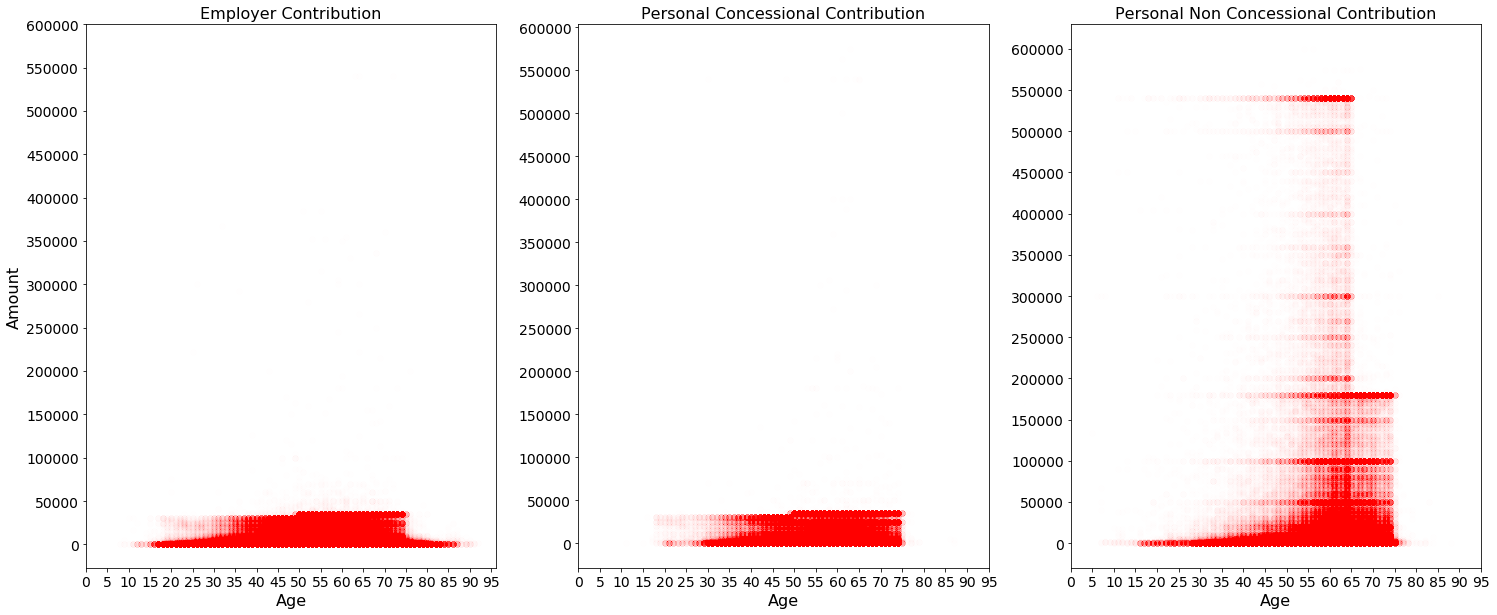

In [29]:
plt.figure(figsize=(25, 10))

plt.subplot(1, 3, 1)
plt.plot(df_employer_contribution['age'], df_employer_contribution['employerCC'], 'ro', alpha=0.005)
plt.title('Employer Contribution', fontsize=16)
plt.xticks(np.arange(0, 100, 5), fontsize=14)
plt.yticks(np.arange(0, 600001, 50000), fontsize=14)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Amount', fontsize=16)

plt.subplot(1, 3, 2)
plt.plot(df_personal_concession['age'], df_personal_concession['personalCC'], 'ro', alpha=0.005)
plt.title('Personal Concessional Contribution', fontsize=16)
plt.xticks(np.arange(0, 100, 5), fontsize=14)
plt.yticks(np.arange(0, 600001, 50000), fontsize=14)
plt.xlabel('Age', fontsize=16)

plt.subplot(1, 3, 3)
plt.plot(df_personal_non_concession['age'], df_personal_non_concession['personalNonCC'], 'ro', alpha=0.005)
plt.title('Personal Non Concessional Contribution', fontsize=16)
plt.xticks(np.arange(0, 100, 5), fontsize=14)
plt.yticks(np.arange(0, 600001, 50000), fontsize=14)
plt.xlabel('Age', fontsize=16)

plt.show()

As shown in the above charts, employer contribution happens through all people aged from 10 to 90 years old, while both personal concessional and non-concessional contribution stops after 74 years old. Also, as shown in the non-concessional contribution, the contribution amount varies from 1 dollor, up to 550,000 dollor, while both employer and personal concessional contribution are below 50,000 dollor. 

##### Question 2: Does super contribution affect by people's location?

In [30]:
df_clean[['id', 'AddressState', 'age', 'amount']].groupby(['AddressState']).agg({
        'id': ['count'],
        'age': ['mean', 'median'],
        'amount': ['mean', 'median']
    })

id        age              amount        
                                count       mean median         mean  median
AddressState                                                                
AUSTRALIAN_CAPITAL_TERRITORY    51288  55.116674   57.0  7741.929024  815.11
NEW_SOUTH_WALES                826144  52.985775   54.0  6202.422984  697.30
NORTHERN_TERRITORY              19492  51.917299   53.0  2892.430147  617.94
QUEENSLAND                     523454  53.341312   54.0  6746.301067  750.00
SOUTH_AUSTRALIA                196004  54.255546   56.0  6931.588202  766.04
TASMANIA                        43337  53.845236   55.0  5074.429159  589.15
VICTORIA                      1000558  53.872293   55.0  6352.594322  730.77
WESTERN_AUSTRALIA              344957  53.625582   55.0  5979.189725  801.41

The mean of contribution amount in ACT (Australian Capital Territory) is more than a double in NT (Northern Territory). Also, the mean age in ACT is 4 years over NT. Therefore, I could make an assumption that people living in NT are young and pay less attention to super, while people living in ACT are close to retire and making more contribution to their super accounts.

#### Question 3: When do employers or people make contributions?

In [31]:
df_trans_date = df_clean.copy()
df_trans_date['transYear'] = df_trans_date['transactionDate'].dt.year
df_trans_date['transMonth'] = df_trans_date['transactionDate'].dt.month
df_trans_date['transDay'] = df_trans_date['transactionDate'].dt.day

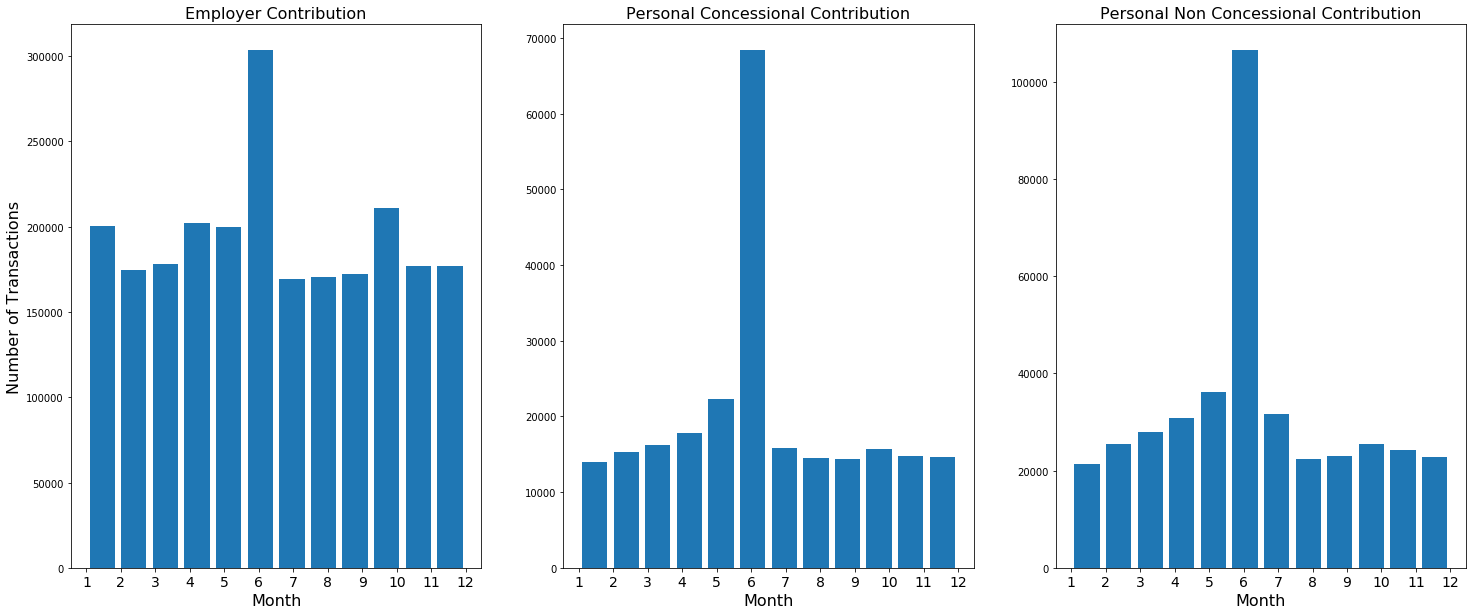

In [32]:
plt.figure(figsize=(25, 10))

plt.subplot(1, 3, 1)
plt.hist(df_trans_date[df_trans_date.employerCC > 0]['transMonth'], bins=12, rwidth=0.8)
plt.title('Employer Contribution', fontsize=16)
plt.xticks(np.arange(1, 13, 1), fontsize=14)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=16)

plt.subplot(1, 3, 2)
plt.hist(df_trans_date[df_trans_date.personalCC > 0]['transMonth'], bins=12, rwidth=0.8)
plt.title('Personal Concessional Contribution', fontsize=16)
plt.xticks(np.arange(1, 13, 1), fontsize=14)
plt.xlabel('Month', fontsize=16)

plt.subplot(1, 3, 3)
plt.hist(df_trans_date[df_trans_date.personalNonCC > 0]['transMonth'], bins=12, rwidth=0.8)
plt.title('Personal Non Concessional Contribution', fontsize=16)
plt.xticks(np.arange(1, 13, 1), fontsize=14)
plt.xlabel('Month', fontsize=16)

plt.show()

For employers, they normally make contribution to employees' supper accounts quarterly. Therefore, it shows four peak months in the plot (Jan, Apr, Jun and Sep). The majority of people make personal contribution in June, because 30th June is cut-off for using current financial year quote.

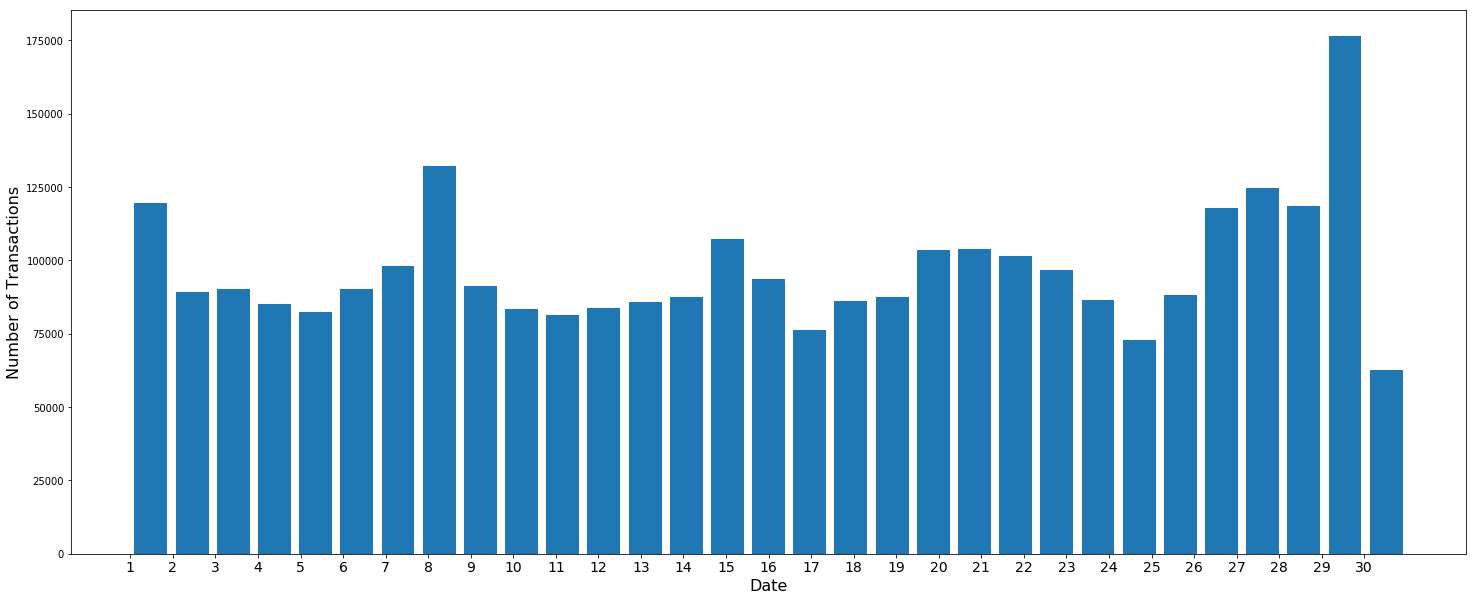

In [33]:
plt.figure(figsize=(25, 10))
plt.hist(df_trans_date['transDay'], bins=31, rwidth=0.8)
plt.xticks(np.arange(1, 31, 1), fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=16)
plt.show()

Also, people like to make contribution on the last day of each month.